# Explore here

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np

In [39]:
# VER BASE DE DATOS:

df_datos_sanitarios = pd.read_csv('../data/raw/demographic_health_data.csv')
df_datos_sanitarios

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [40]:
columnas = df_datos_sanitarios.columns.tolist()
pd.set_option('display.max_columns', None)
print(columnas)

['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'Percent of adults with les

In [41]:
print(df_datos_sanitarios.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB
None


In [42]:
print(df_datos_sanitarios.describe())

               fips       TOT_POP           0-9  0-9 y/o % of total pop  \
count   3140.000000  3.140000e+03  3.140000e+03             3140.000000   
mean   30401.640764  1.041894e+05  1.274030e+04               11.871051   
std    15150.559265  3.335834e+05  4.180730e+04                2.124081   
min     1001.000000  8.800000e+01  0.000000e+00                0.000000   
25%    18180.500000  1.096325e+04  1.280500e+03               10.594639   
50%    29178.000000  2.580050e+04  3.057000e+03               11.802727   
75%    45081.500000  6.791300e+04  8.097000e+03               12.951840   
max    56045.000000  1.010552e+07  1.208253e+06               25.460677   

             19-Oct  10-19 y/o % of total pop         20-29  \
count  3.140000e+03               3140.000000  3.140000e+03   
mean   1.336798e+04                 12.694609  1.446933e+04   
std    4.228439e+04                  1.815044  4.957773e+04   
min    0.000000e+00                  0.000000  0.000000e+00   
25%    1.

In [43]:
print(df_datos_sanitarios.isnull().sum())

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64


LIMPIEZA DE DATOS:

In [44]:
df_datos_sanitarios.copy()

# Eliminar columnas irrelevantes:

cols_to_drop = [
    'fips', 'COUNTY_NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS',
    'POP_ESTIMATE_2018', 'Total Population', 'county_pop2018_18 and older',
    'CI90LBINC_2018', 'CI90UBINC_2018',
    'anycondition_Lower 95% CI', 'anycondition_Upper 95% CI',
    'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI',
    'Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI',
    'COPD_Lower 95% CI', 'COPD_Upper 95% CI',
    'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI',
    'CKD_Lower 95% CI', 'CKD_Upper 95% CI',
    '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+',
    'White-alone pop', 'Black-alone pop', 'Native American/American Indian-alone pop',
    'Asian-alone pop', 'Hawaiian/Pacific Islander-alone pop', 'Two or more races pop',
    'Less than a high school diploma 2014-18',
    'High school diploma only 2014-18',
    "Some college or associate's degree 2014-18",
    "Bachelor's degree or higher 2014-18",
    'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
    'Urban_rural_code',
    'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018',
    'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018',
    'R_NET_MIG_2018'
]
df_sanit_limpio = df_datos_sanitarios.drop(columns= cols_to_drop, errors='ignore')
df_sanit_limpio

,TOT_POP,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,80+ y/o % of total pop,% White-alone,% Black-alone,% NA/AI-alone,% Asian-alone,% Hawaiian/PI-alone,% Two or more races,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Population Aged 60+,Percent of Population Aged 60+,anycondition_prevalence,anycondition_number,Obesity_prevalence,Obesity_number,Heart disease_prevalence,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number
0,55601,12.206615,13.735364,12.370281,12.749771,13.636445,13.917016,10.478229,7.284042,3.622237,76.725239,19.630942,0.480207,1.224798,0.111509,1.827305,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,10523,19.1,47.6,20181,35.8,15193,7.9,3345,8.6,3644,12.9,5462,3.1,1326
1,218022,11.355276,12.344167,10.814964,11.564429,12.539102,13.753658,13.728890,9.602701,4.296814,87.285228,8.940382,0.772399,1.150343,0.066966,1.784682,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,53519,26.3,40.2,68790,29.7,50761,7.8,13414,8.6,14692,12.0,20520,3.2,5479
2,24881,10.980266,11.896628,13.134520,12.865239,12.354809,13.174712,12.362847,9.018930,4.212049,49.069571,48.398376,0.659137,0.454162,0.184880,1.233873,27.0,35.7,25.1,12.2,6788,30.9,43.9,36.7,34382,5.2,34382,68.9,217.1,196.7,77.2,71.2,7.6,6.9,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,5,6150,23.5,57.5,11325,40.7,8013,11.0,2159,12.1,2373,19.7,3870,4.5,887
3,22400,10.964286,11.589286,13.522321,13.897321,13.562500,13.906250,11.361607,7.691964,3.504464,76.834821,21.294643,0.437500,0.236607,0.116071,1.080357,16.8,47.3,24.4,11.5,4400,21.8,27.8,26.3,46064,4.0,46064,92.3,217.1,196.7,77.2,71.2,7.6,6.9,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,0,4773,21.1,51.6,9190,38.7,6894,8.6,1533,10.0,1789,14.1,2511,3.3,595
4,57840,12.266598,13.087828,11.656293,11.901798,12.921853,13.561549,12.041840,8.525242,4.036999,95.878285,1.642462,0.653527,0.319848,0.121024,1.384855,19.8,34.0,33.5,12.6,7527,13.2,18.0,15.5,50412,3.5,50412,101.1,217.1,196.7,77.2,71.2,7.6,6.9,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,6,13600,23.6,46.3,20584,34.0,15112,9.2,4101,10.5,4661,13.5,6017,3.4,1507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,43051,14.178532,14.694200,12.448027,15.277229,12.389956,12.220390,11.481731,5.105572,2.204362,93.835219,1.375113,1.544680,1.010429,0.157952,2.076607,9.0,33.3,35.7,22.0,3540,8.4,10.0,8.5,73315,4.2,73315,117.8,207.9,199.6,79.8,76.2,10.6,10.4,21.311749,11.997173,2.160982,9

In [45]:
df_sanit_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 55 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   TOT_POP                                                                        3140 non-null   int64  
 1   0-9 y/o % of total pop                                                         3140 non-null   float64
 2   10-19 y/o % of total pop                                                       3140 non-null   float64
 3   20-29 y/o % of total pop                                                       3140 non-null   float64
 4   30-39 y/o % of total pop                                                       3140 non-null   float64
 5   40-49 y/o % of total pop                                                       3140 non-null   float64
 6   50-59 y/o % of total pop

In [46]:
df_sanit_limpio.describe().T

,count,mean,std,min,25%,50%,75%,max
TOT_POP,3140.0,104189.412420,333583.395432,88.000000,10963.250000,25800.500000,67913.000000,1.010552e+07
0-9 y/o % of total pop,3140.0,11.871051,2.124081,0.000000,10.594639,11.802727,12.951840,2.546068e+01
10-19 y/o % of total pop,3140.0,12.694609,1.815044,0.000000,11.674504,12.687422,13.659282,2.330437e+01
20-29 y/o % of total pop,3140.0,12.283979,3.126297,0.000000,10.496774,11.772649,13.182260,3.757020e+01
30-39 y/o % of total pop,3140.0,11.751535,1.696599,6.092789,10.689322,11.580861,12.639379,2.222513e+01
40-49 y/o % of total pop,3140.0,11.556685,1.372935,2.631579,10.685197,11.618372,12.386083,1.943037e+01
50-59 y/o % of total pop,3140.0,13.526733,1.481692,5.316361,12.738561,13.621339,14.429115,2.045455e+01
60-69 y/o % of total pop,3140.0,13.182225,2.532498,3.444403,11.621232,13.013409,14.467254,2.727273e+01
70-79 y/o % of total pop,3140.0,8.399382,2.214915,2.199551,7.032275,8.208162,9.445777,3.132796e+01
80+ y/o % of total pop,3140.0,4.733801,1.535028,0.000000,3.738648,4.565338,5.484143,2.272727e+01


In [47]:
df_sanit_limpio.isnull().sum().sort_values(ascending=False).head(20)

TOT_POP                                                                    0
0-9 y/o % of total pop                                                     0
10-19 y/o % of total pop                                                   0
20-29 y/o % of total pop                                                   0
30-39 y/o % of total pop                                                   0
40-49 y/o % of total pop                                                   0
50-59 y/o % of total pop                                                   0
60-69 y/o % of total pop                                                   0
70-79 y/o % of total pop                                                   0
80+ y/o % of total pop                                                     0
% White-alone                                                              0
% Black-alone                                                              0
% NA/AI-alone                                                              0

DISTRIBUCIÓN DE LA VARIABLE:

In [48]:
y = df_sanit_limpio['diabetes_prevalence']
y

0       12.9
1       12.0
2       19.7
3       14.1
4       13.5
        ... 
3135     8.9
3136     7.2
3137    10.4
3138    11.3
3139    11.7
Name: diabetes_prevalence, Length: 3140, dtype: float64

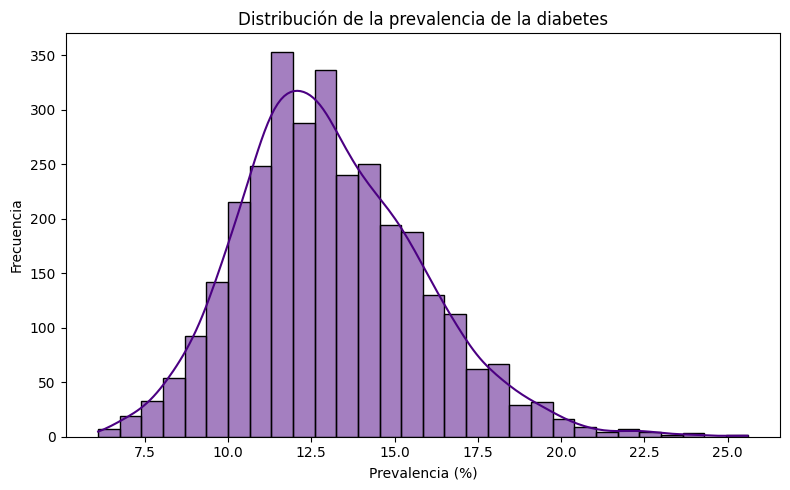

In [49]:
plt.figure(figsize=(8, 5))
sns.histplot(df_sanit_limpio['diabetes_prevalence'], kde=True, bins=30, color='indigo', edgecolor='black')
plt.title("Distribución de la prevalencia de la diabetes")
plt.xlabel("Prevalencia (%)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

CORRELACIONES DE LA VARIABLE:

In [50]:
# CORRELACIONES:

correlations = df_sanit_limpio.corr(numeric_only=True)['diabetes_prevalence'].sort_values(ascending=False)
correlations

diabetes_prevalence                                                              1.000000
CKD_prevalence                                                                   0.918514
anycondition_prevalence                                                          0.850219
PCTPOV017_2018                                                                   0.840088
PCTPOV517_2018                                                                   0.833527
Heart disease_prevalence                                                         0.831021
COPD_prevalence                                                                  0.789044
PCTPOVALL_2018                                                                   0.735489
Obesity_prevalence                                                               0.699402
Percent of adults with less than a high school diploma 2014-18                   0.699251
Unemployment_rate_2018                                                           0.490972
Percent of

ENTRENAMIENTO:

In [51]:
X = df_sanit_limpio.drop(columns=['diabetes_prevalence'])
y = df_sanit_limpio['diabetes_prevalence']

X = X.select_dtypes(include='number')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

REGRESIÓN LINEAL:

In [52]:
# LINEAL BÁSICA:

# Modelo:

lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicciones:

y_pred_lr = lr.predict(X_test)

# Evaluación:

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"MSE (Linear Regression): {mse_lr:.2f}")
print(f"R2 Score (Linear Regression): {r2_lr:.4f}")

MSE (Linear Regression): 0.26
R2 Score (Linear Regression): 0.9673


In [58]:
# LASSO: 

# Modelo:
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

# Predicción:
y_pred_lasso = lasso.predict(X_test)

# Evaluación:

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"MSE (Lasso Regression): {mse_lasso:.2f}")
print(f"R2 Score (Lasso Regression): {r2_lasso:.4f}")
print(f"Mejor alpha encontrado: {lasso.alpha_:.4f}")

MSE (Lasso Regression): 3.66
R2 Score (Lasso Regression): 0.5451
Mejor alpha encontrado: 332.7278


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.636e+00, tolerance: 1.469e+00
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.092e+00, tolerance: 1.469e+00
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Dual

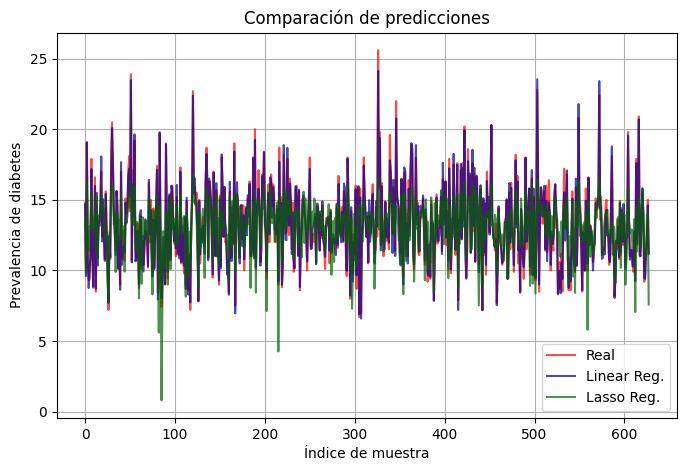

In [61]:
# COMPARACIÓN ENTRE LOS DOS MODELOS:

plt.figure(figsize=( 8, 5))
plt.plot(y_test.values, label='Real', alpha=0.7, color='red')
plt.plot(y_pred_lr, label='Linear Reg.', alpha=0.7, color='darkblue')
plt.plot(y_pred_lasso, label='Lasso Reg.', alpha=0.7, color='darkgreen')
plt.legend()
plt.title('Comparación de predicciones')
plt.xlabel('Índice de muestra')
plt.ylabel('Prevalencia de diabetes')
plt.grid(True)
plt.show()

Linear y Lasso siguen un patrón general, no hay desvíos pero si que hay muchas líneas irregulares. Lasso si que parece menos fuerte que Linear que da algunos datos algo extremos. 

ANÁLISIS R2 EN FUNCIÓN DE LASSO: 

/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1363: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.144e+02, tolerance: 1.823e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_co

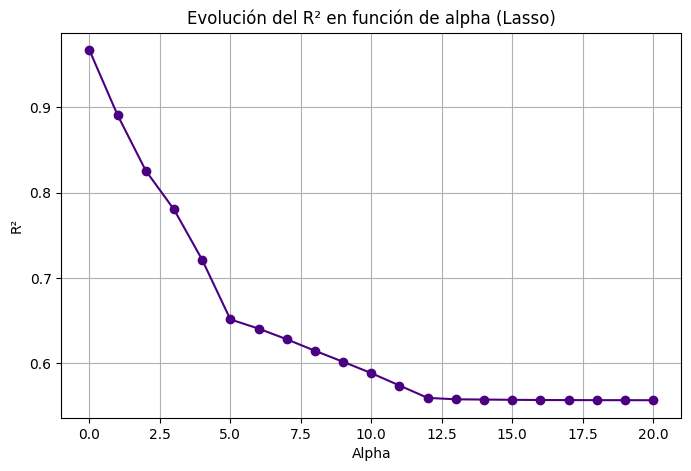

In [ ]:
alphas = list(range(0, 21))
r2_scores = []

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    r2 = r2_score(y_test, lasso.predict(X_test))
    r2_scores.append(r2)

# Gráfico de evolución
plt.figure(figsize=(8, 5))
plt.plot(alphas, r2_scores, marker='o', color='indigo')
plt.title('Evolución del R² en función de alpha (Lasso)')
plt.xlabel('Alpha')
plt.ylabel('R²')
plt.grid(True)
plt.show()

A medida que el valor de alpha aumenta, el modelo Lasso se vuelve más estricto y reduce su capacidad para ajustarse bien a los datos, por eso el R² baja.